scipy.optimize.curve_fit に関する記事を次々書いているところですが、

* <a href="https://qiita.com/maskot1977/items/d16a385e23ed07e28037">少ない観測値を補間してから、正規分布の線形和で近似する</a>
* <a href="https://qiita.com/maskot1977/items/e4f5f71200180865986e">カーブフィッティング手法 scipy.optimize.curve_fit の使い方を理解する</a>
* <a href="https://qiita.com/maskot1977/items/0f8a1ac961845735ce06">ロジスティック回帰を scipy.optimize.curve_fit で実装する</a> 

に続いて、今回は「多層パーセプトロン (Multilayer perceptron, MLP)を scipy.optimize.curve_fit で実装する」に挑戦します。

# 多層パーセプトロン (Multilayer perceptron, MLP) とは

過去に 

* <a href="https://qiita.com/maskot1977/items/5871e0b1b6a44f17c327">多層パーセプトロン (Multilayer perceptron, MLP)をExcelで理解する</a>
* <a href="https://qiita.com/maskot1977/items/d0253e1eab1ff1315dff">多層パーセプトロン (Multilayer perceptron, MLP)をPythonで理解する</a>

を書いたので、そちらをご覧ください。前者の方が内容は平易だと思います。

# 「あやめのデータ」を読み込む

「あやめのデータ」については <a href="https://qiita.com/maskot1977/items/453eddf5aa154c04668c">実習用データ</a>　をご参照ください。

In [3]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/iris.txt'

In [1]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib.request
urllib.request.urlretrieve(url, 'iris.txt')

In [14]:
import pandas as pd
df = pd.read_csv('iris.txt', delimiter="\t", index_col=0)
df

In [43]:
X = df.iloc[:, :4].T.as_matrix()
Y = np.array(df.iloc[:, 4])

/Users/kot/miniconda3/envs/py3new/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


# 多層パーセプトロンの実装（出力層のノードが３つ）

<a href="https://qiita.com/maskot1977/items/5871e0b1b6a44f17c327">多層パーセプトロン (Multilayer perceptron, MLP)をExcelで理解する</a> と同じく、入力層Xに4つのノード、隠れ層Hには3つのノード、出力層Oに3つのノードを配置したMLPを実装しようと思います。

In [54]:
def mlp(X, *params):
    h01, h02, h03, h04, h0b = params[0], params[1], params[2], params[3], params[4]
    h11, h12, h13, h14, h1b = params[5], params[6], params[7], params[8], params[9]
    h21, h22, h23, h24, h2b = params[10], params[11], params[12], params[13], params[14]
    
    o01, o02, o03, o0b = params[15], params[16], params[17], params[18]
    o11, o12, o13, o1b = params[19], params[20], params[21], params[22]
    o21, o22, o23, o2b = params[23], params[24], params[25], params[26]
    
    h0 = 1. / (1. + np.exp(-(h01 * X[0] + h02 * X[1] + h03 * X[2] + h04 * X[3] + h0b)))
    h1 = 1. / (1. + np.exp(-(h11 * X[0] + h12 * X[1] + h13 * X[2] + h14 * X[3] + h1b)))
    h2 = 1. / (1. + np.exp(-(h21 * X[0] + h22 * X[1] + h23 * X[2] + h24 * X[3] + h2b)))
    
    o0 = 1. / (1. + np.exp(-(o01 * h0 + o02 * h1 + o03 * h2 + o0b)))
    o1 = 1. / (1. + np.exp(-(o11 * h0 + o12 * h1 + o13 * h2 + o1b)))
    o2 = 1. / (1. + np.exp(-(o21 * h0 + o22 * h1 + o23 * h2 + o2b)))
    
    return np.array([o0, o1, o2])

... と、ここで手が止まった。「出力層のノードが３つ」だと...？

今まで scipy.optimize.curve_fit で取り扱った関数のアウトプットは、スカラーだった。ベクトルをアウトプットする関数を scipy.optimize.curve_fit で取り扱えるのか？

## 出力層に合わせて、Yも one-hot-vector にする

そうやって scipy.optimize.curve_fit が取り扱ってくれればいいんだが...

In [74]:
Y = pd.get_dummies(pd.DataFrame(["y=" + str(y) for y in df.iloc[:, 4].as_matrix()])).as_matrix()

/Users/kot/miniconda3/envs/py3new/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [85]:
from scipy.optimize import curve_fit  
popt, pcov = curve_fit(mlp,X,Y.T, p0=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]) # poptは最適推定値、pcovは共分散
popt

TypeError: Improper input: N=27 must not exceed M=3

ダメでした...(´・ω・`)

# 多層パーセプトロンの実装（出力層のノードが１つ）

出力層のノードが１つの場合は、今までと同じ。これまでの scipy.optimize.curve_fit に関する記事が理解できていれば、書けますよね！？

In [86]:
def mlp(X, *params):
    h01, h02, h03, h04, h0b = params[0], params[1], params[2], params[3], params[4]
    h11, h12, h13, h14, h1b = params[5], params[6], params[7], params[8], params[9]
    h21, h22, h23, h24, h2b = params[10], params[11], params[12], params[13], params[14]
    
    o01, o02, o03, o0b = params[15], params[16], params[17], params[18]
    
    h0 = 1. / (1. + np.exp(-(h01 * X[0] + h02 * X[1] + h03 * X[2] + h04 * X[3] + h0b)))
    h1 = 1. / (1. + np.exp(-(h11 * X[0] + h12 * X[1] + h13 * X[2] + h14 * X[3] + h1b)))
    h2 = 1. / (1. + np.exp(-(h21 * X[0] + h22 * X[1] + h23 * X[2] + h24 * X[3] + h2b)))
    
    o0 = 1. / (1. + np.exp(-(o01 * h0 + o02 * h1 + o03 * h2 + o0b)))
    
    return o0

データも取り直し。<a href="https://qiita.com/maskot1977/items/0f8a1ac961845735ce06">ロジスティック回帰を scipy.optimize.curve_fit で実装する</a> と同じものです。

In [100]:
X1 = [4.7, 4.5, 4.9, 4.0, 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 
      3.5, 4.2, 4.0, 4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 
      4.8, 4.0, 4.9, 4.7, 4.3, 4.4, 4.8, 5.0, 4.5, 3.5, 
      3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4.0, 
      4.4, 4.6, 4.0, 3.3, 4.2, 4.2, 4.2, 4.3, 3.0, 4.1, 
      6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 
      5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 
      5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 
      6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 
      5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]

X2 = [1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1.0, 1.3, 1.4, 
      1.0, 1.5, 1.0, 1.4, 1.3, 1.4, 1.5, 1.0, 1.5, 1.1, 
      1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7, 1.5, 1.0, 
      1.1, 1.0, 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 
      1.2, 1.4, 1.2, 1.0, 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 
      2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 
      2.0, 1.9, 2.1, 2.0, 2.4, 2.3, 1.8, 2.2, 2.3, 1.5, 
      2.3, 2.0, 2.0, 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6, 
      1.9, 2.0, 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 
      2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2.0, 2.3, 1.8]

X3 = [7.0, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 
      5.0, 5.9, 6.0, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 
      5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6.0, 5.7, 
      5.5, 5.5, 5.8, 6.0, 5.4, 6.0, 6.7, 6.3, 5.6, 5.5, 
      5.5, 6.1, 5.8, 5.0, 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 
      6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 
      6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 
      6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 
      7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 
      6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]

X4 = [3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 
      2.0, 3.0, 2.2, 2.9, 2.9, 3.1, 3.0, 2.7, 2.2, 2.5, 
      3.2, 2.8, 2.5, 2.8, 2.9, 3.0, 2.8, 3.0, 2.9, 2.6, 
      2.4, 2.4, 2.7, 2.7, 3.0, 3.4, 3.1, 2.3, 3.0, 2.5, 
      2.6, 3.0, 2.6, 2.3, 2.7, 3.0, 2.9, 2.9, 2.5, 2.8, 
      3.3, 2.7, 3.0, 2.9, 3.0, 3.0, 2.5, 2.9, 2.5, 3.6, 
      3.2, 2.7, 3.0, 2.5, 2.8, 3.2, 3.0, 3.8, 2.6, 2.2, 
      3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3.0, 2.8, 3.0, 
      2.8, 3.8, 2.8, 2.8, 2.6, 3.0, 3.4, 3.1, 3.0, 3.1, 
      3.1, 3.1, 2.7, 3.2, 3.3, 3.0, 2.5, 3.0, 3.4, 3.0]

X = np.array([X1, X2, X3, X4])

Y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

結果表示の関数も <a href="https://qiita.com/maskot1977/items/0f8a1ac961845735ce06">ロジスティック回帰を scipy.optimize.curve_fit で実装する</a> と同じ。

In [95]:
def confusion_table(y_pred, y_true):
    true_positives = [] # TP
    false_positives = [] # FP
    false_negatives = [] # FN
    true_negatives = [] # TN
    for y1, y2 in zip(y_pred, y_true):
        if y1 >= 0.5:
            if y2 >= 0.5:
                true_positives.append(y1)
            else:
                false_positives.append(y1)
        else:
            if y2 >= 0.5:
                false_negatives.append(y1)
            else:
                true_negatives.append(y1)
    return (true_positives, false_positives, false_negatives, true_negatives)

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_result(TP, FP, FN, TN):
    print("Accuracy: ", len(TP + TN) / len(TP + FP + FN + TN))
    plt.figure(figsize=(12,4))
    plt.hist([TP, FP, FN, TN], label=['TP', 'FP', 'FN', 'TN'], color=['blue', 'green', 'orange', 'red'])
    plt.legend()
    plt.grid()
    plt.show()

## 計算実行

In [94]:
from scipy.optimize import curve_fit  
popt, pcov = curve_fit(mlp,X,Y, p0=[1,0,0,0,0, 0,0,0,0,0,
                                     0,0,0,0,0, 0,0,0,0]) # poptは最適推定値、pcovは共分散
popt

array([ 1.57166185e+01,  1.58250335e+01, -3.52251392e+00, -7.49692230e+00,
       -5.89003641e+01,  3.80089003e-02,  2.37483939e-01,  2.87007844e-01,
       -9.48869044e-01,  1.39257951e+00, -1.28133971e-01, -5.79757478e-01,
        3.16485573e-01, -1.03528732e+00,  1.34439583e+00,  1.12009673e+02,
       -5.14928444e+01, -5.51022639e+01, -3.22706767e+01])

Accuracy:  0.99


/Users/kot/miniconda3/envs/py3new/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


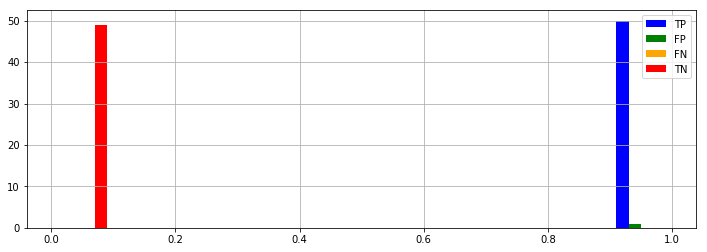

In [99]:
TP, FP, FN, TN = confusion_table(mlp(X, 1.57166185e+01,  1.58250335e+01, -3.52251392e+00, -7.49692230e+00,
       -5.89003641e+01,  3.80089003e-02,  2.37483939e-01,  2.87007844e-01,
       -9.48869044e-01,  1.39257951e+00, -1.28133971e-01, -5.79757478e-01,
        3.16485573e-01, -1.03528732e+00,  1.34439583e+00,  1.12009673e+02,
       -5.14928444e+01, -5.51022639e+01, -3.22706767e+01), Y)
show_result(TP, FP, FN, TN)

頑張ったわりには、ロジスティック回帰と同じ性能だった(´・ω・`)

# 結論

多層パーセプトロン (Multilayer perceptron, MLP)を scipy.optimize.curve_fit で実装する試みは、出力層が１つだけなら、可能でした。出力層が２つ以上の場合は、どうすれば良いかわかりません。無理かも。